In [6]:
################################# INTRODUCTION #################################
# The goal of this exercise is to develop machine learning models so that you can use features of a property (eg. number of rooms, number of bathrooms, distance from city center, etc.)
# to help you predict the price of the property. We will use several, simple machine learning models: Decision Tree, Random Forest, and XGBoost.

# You may need to to download and install the specified packages
# pip install kaggle
# pip install --user kaggle (on Mac/Linux)

#libraries and packages to import
import pandas as pd
# from google.colab import files
from datetime import datetime
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

Decision Tree with one layer of depth


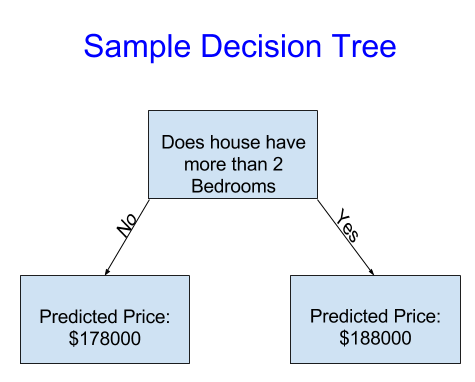

In [7]:
# The first machine learning model we'll try is called Decision Tree. You can follow this turorial on Kaggle: https://www.kaggle.com/code/dansbecker/how-models-work
#Show an illustration for a simple decision tree
print("Decision Tree with one layer of depth")
Image("https://storage.googleapis.com/kaggle-media/learn/images/7tsb5b1.png")

Decision Tree with more depth


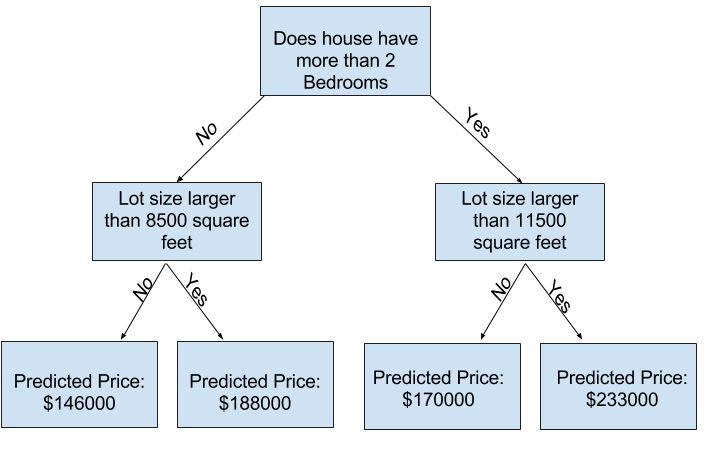

In [12]:
#Show an illustration for a more sophisticated decision tree
print("Decision Tree with more depth")
Image('https://storage.googleapis.com/kaggle-media/learn/images/R3ywQsR.png')

In [22]:
# Link to Melbourne Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data
# Melbourne housting dataset has pricing and house details of 13,500 houses in Melbourne suburbs and 21 columns of data for each house including address, number of rooms, garage size, year built,
# number of bathrooms, number of carspots, distance from central business district, etc. You can read more about the dataset from the link.

# Import pandas library
import pandas as pd

file_path = 'melb_data.csv' 

melb_data = pd.read_csv(file_path)

In [54]:
########################## Understanding your data #############################

# Upload your data into a dataframe, view the first five rows, and describe it using statistics

# Create a dataframe called "melbourne_data." You may need to replace 'melb_data.csv' with the actual name of your CSV file, if it is different
melbourne_data = pd.read_csv('melb_data.csv')

# Display the first five rows of the dataset
print("The first five rows in the dataset")
print(melbourne_data.head())
print()
print()

# Print a summary of the data in the DataFrame
print("Important statistics from the dataset")
print(melbourne_data.describe())

################################################################################
#### TO DO: Q1.1 How many entries are in this dataset?
################################################################################

################################################################################
#### TO DO: Q1.2 Find the average landsize of all of the properties. All sizes are in square meters.
################################################################################

################################################################################
#### TO DO: Q1.3 Find the price of the newest home in the dataset. All prices are in dollars.
################################################################################

################################################################################
#### TO DO: Q1.4 Which columns have incomplete data? For example, which columns don't have 13,580 entries?
################################################################################


# Import the pandas library for data manipulation
import pandas as pd

# Specify the path to the dataset you uploaded
file_path = 'melb_data.csv'

# Read the dataset into a pandas DataFrame
melb_data = pd.read_csv(file_path)

# Q1.1: Calculate the number of entries in the dataset
num_entries = len(melb_data)

# Q1.2: Calculate the average land size of all properties in the dataset
average_landsize = melb_data['Landsize'].mean()

# Q1.3: Find the price of the newest home in the dataset
newest_home_price = melb_data.sort_values('YearBuilt', ascending=False)['Price'].iloc[0]

# Q1.4: Identify columns with incomplete data
incomplete_columns = melb_data.isnull().sum()
incomplete_columns = incomplete_columns[incomplete_columns > 0].sort_values(ascending=False)

# Print the answers
print(f"Q1.1: The Melbourne housing dataset contains {num_entries} entries.")
print(f"Q1.2: The average land size of all properties is approximately {average_landsize:.2f} square meters.")
print(f"Q1.3: The price of the newest home in the dataset is ${newest_home_price:,.0f}.")
print("Q1.4: Columns with incomplete data (indicating the number of missing entries):")
print(incomplete_columns)


The first five rows in the dataset
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitu

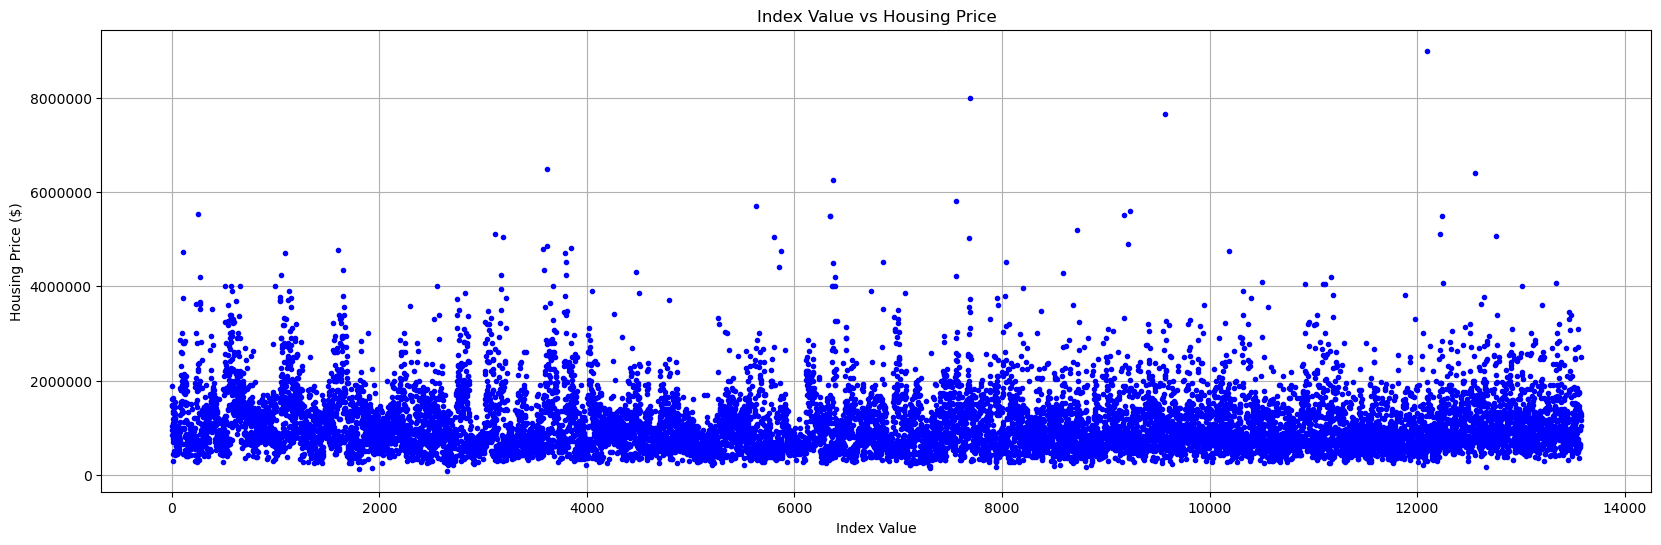

In [55]:
# Plot the index value versus price for the 13,580 entries. The index value refers to the position of the entry within the dataframe.
# The first entry has an index value of 0. The second entry has an index value of 1, etc.

################################################################################
#### TO DO: Q1.5 Define a pandas dataframe. Define what an index value is.
################################################################################

# Extracting the index values and housing prices
index_values = melbourne_data.index
housing_prices = melbourne_data['Price']

# Plotting index value vs housing price
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)  # Adjust markersize as needed
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

A pandas DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). DataFrames are one of the most commonly used data structures in data analysis and manipulation.

Index Value: In the context of a pandas DataFrame, the index value is a label that uniquely identifies each row/entry. By default, pandas assigns integer labels starting from 0 for the first row, 1 for the second, and so on, but the index can also consist of dates, strings, or other hashable Python objects. The index values serve as a way to access and reference rows within the DataFrame efficiently.

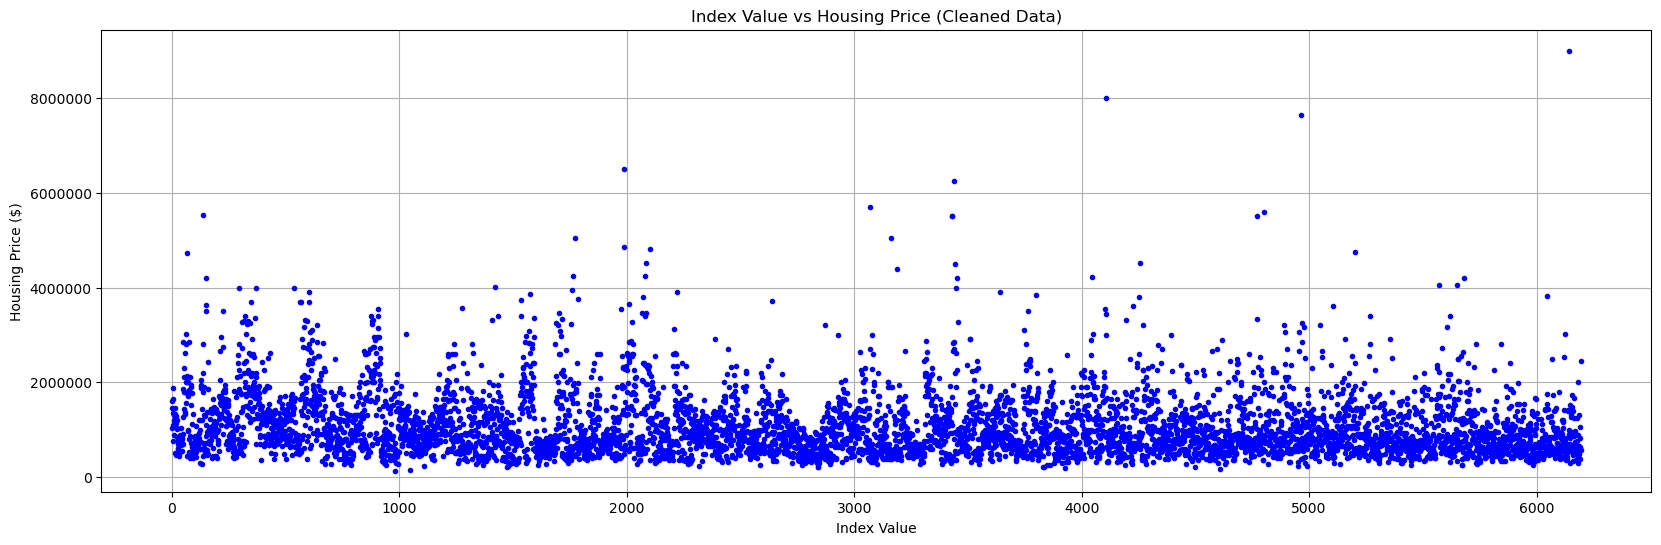

(None,
              Rooms         Price     Distance     Postcode     Bedroom2  \
 count  6196.000000  6.196000e+03  6196.000000  6196.000000  6196.000000   
 mean      2.931407  1.068828e+06     9.751097  3101.947708     2.902034   
 std       0.971079  6.751564e+05     5.612065    86.421604     0.970055   
 min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
 25%       2.000000  6.200000e+05     5.900000  3044.000000     2.000000   
 50%       3.000000  8.800000e+05     9.000000  3081.000000     3.000000   
 75%       4.000000  1.325000e+06    12.400000  3147.000000     3.000000   
 max       8.000000  9.000000e+06    47.400000  3977.000000     9.000000   
 
           Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
 count  6196.000000  6196.000000   6196.000000   6196.000000  6196.000000   
 mean      1.576340     1.573596    471.006940    141.568645  1964.081988   
 std       0.711362     0.929947    897.449881     90.834824    38.105673   

In [57]:
# First, we'll drop the rows with missing values from the 'melb_data' DataFrame and reset its index.
# This creates a new DataFrame without missing values and with a reindexed sequence.

melbourne_data_cleaned = melb_data.dropna(axis=0)
melbourne_data_cleaned.reset_index(drop=True, inplace=True)

# Display the description of the cleaned dataset to understand its statistics.
description_cleaned_data = melbourne_data_cleaned.describe()

# Q1.6: Count the number of entries in the new cleaned dataset
num_entries_cleaned = len(melbourne_data_cleaned)

# Extracting the index values and housing prices from the cleaned dataset
index_values_cleaned = melbourne_data_cleaned.index
housing_prices_cleaned = melbourne_data_cleaned['Price']

# Plotting index value vs housing price for the cleaned dataset
plt.figure(figsize=(20, 6))
plt.plot(index_values_cleaned, housing_prices_cleaned, marker='o', linestyle='', color='b', markersize=3)  # Adjust markersize as needed
plt.title('Index Value vs Housing Price (Cleaned Data)')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation for the housing prices on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show(), description_cleaned_data, num_entries_cleaned


In [58]:
################################################################################
################################################################################
############## Section 2: Building a Machine Learning Model  ###################
################################################################################
################################################################################

############################# Selecting features ###############################

# Because we want to predict a house's value based on its features (i.e. number of bedrooms, number of bathrooms, etc), we can set one of the columns as the prediction target.
# In this case, the "Price" is the prediction target. Conventionally, this prediction target is called "y"
y = melbourne_data.Price

# We'll start by selecting a few features which we may play an important role in determining the price of a house.
# To select some features, we'll need to see a list of all columns in the dataset.
# The columns that are inputted into our model (and later used to make predictions) are called "features."
# Sometimes, you will use all columns except the target ("Price") as features. Other times you'll be better off with fewer features.
# For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.
print(melbourne_data.columns)    #prints the list of column names
type(melbourne_data.columns)
print()

################################################################################
#### TO DO: Q2.1 What are the names of all the columns in the dataset? How many columns in the dataset?
################################################################################

column_names = melbourne_data_cleaned.columns
num_columns = len(column_names)

column_names, num_columns



Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')



(Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'Regionname', 'Propertycount'],
       dtype='object'),
 21)

In [59]:
# We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).
# We'll be using these five features to predict house prices.

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = melbourne_data[melbourne_features]

# Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988
std,0.971079,0.711362,897.449881,90.834824,38.105673
min,1.000000,1.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,152.000000,91.000000,1940.000000
50%,3.000000,1.000000,373.000000,124.000000,1970.000000
75%,4.000000,2.000000,628.000000,170.000000,2000.000000
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000


In [63]:
#use the .head() command to check the first five rows of data
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
0,2,1.0,156.0,79.0,1900.0
1,3,2.0,134.0,150.0,1900.0
2,4,1.0,120.0,142.0,2014.0
3,3,2.0,245.0,210.0,1910.0
4,2,1.0,256.0,107.0,1890.0


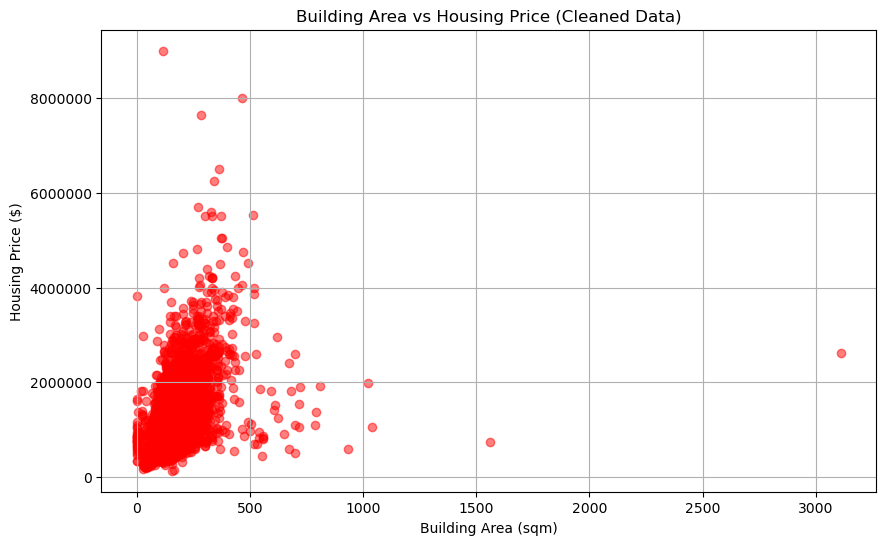

In [62]:
################################################################################
#### TO DO: Q2.3 Plot a graph of building area (x-axis) vs housing price (y-axis). Include this plot in your deliverable
################################################################################

# It appears there was an issue because the variable 'X' wasn't defined in the current context. Let's define it correctly and then plot.

# Selecting the features for 'X' from the cleaned dataset
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X_cleaned = melbourne_data_cleaned[melbourne_features]

# Extracting 'BuildingArea' and 'Price' from the cleaned dataset for plotting
building_area_cleaned = X_cleaned['BuildingArea']
y_cleaned = melbourne_data_cleaned['Price']

# Plotting building area vs housing price for the cleaned dataset
plt.figure(figsize=(10, 6))
plt.scatter(building_area_cleaned, y_cleaned, color='r', alpha=0.5)
plt.title('Building Area vs Housing Price (Cleaned Data)')
plt.xlabel('Building Area (sqm)')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation for housing price on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [64]:
################### Build a Machine Learning Model #############################

# You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code.
# Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

#The steps to building and using a model are:

# 1 Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
# 2 Fit: Capture patterns from provided data. This is the heart of modeling.
# 3 Predict: Just what it sounds like
# 4 Evaluate: Determine how accurate the model's predictions are.

# Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=2)   # Many machine learning models allow some randomness in model training.. Specifying a number for random_state ensures you get the same results in each run.

# Fit model
melbourne_model.fit(X, y)
print("Congratulations! You just made a machine learning model called Decision Tree. THis model can be used to make house price predictions!")


Congratulations! You just made a machine learning model called Decision Tree. THis model can be used to make house price predictions!


In [79]:
# We now have a fitted model that we can use to make predictions.

# Make predictions for all houses in your dataset
predictions = melbourne_model.predict(X)

# Create a new DataFrame with the predicted prices added as a new column
predicted_data = melbourne_data.copy()  # Create a copy of the original DataFrame
predicted_data['Predicted_Price'] = predictions  # Add a new column for predicted prices

# Print the first five rows of the DataFrame with predicted prices
print(predicted_data[['Price', 'Predicted_Price', 'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']].head(n=15))

################################################################################
#### TO DO: Q2.4 Review the actual price ("Price") and predicted price ("Predicted Price") and summarize your thoughts. Look at the first fifteen rows of the dataframe.
################################################################################
predicted_data = melbourne_data.copy()
predicted_data['Predicted_Price'] = predictions  # Adding predicted prices
predicted_data[['Price', 'Predicted_Price', 'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']].head(15)

        Price  Predicted_Price  Rooms  Bathroom  Landsize  BuildingArea  \
0   1035000.0        1035000.0      2       1.0     156.0          79.0   
1   1465000.0        1465000.0      3       2.0     134.0         150.0   
2   1600000.0        1600000.0      4       1.0     120.0         142.0   
3   1876000.0        1876000.0      3       2.0     245.0         210.0   
4   1636000.0        1636000.0      2       1.0     256.0         107.0   
5   1097000.0        1097000.0      2       1.0     220.0          75.0   
6   1350000.0        1350000.0      3       2.0     214.0         190.0   
7    750000.0         750000.0      2       2.0       0.0          94.0   
8   1310000.0        1310000.0      2       1.0     238.0          97.0   
9   1200000.0        1200000.0      3       2.0     113.0         110.0   
10  1176500.0        1176500.0      3       1.0     138.0         105.0   
11   890000.0         890000.0      2       1.0     150.0          73.0   
12  1330000.0        1330

,Price,Predicted_Price,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
0,1035000.0,1035000.0,2,1.0,156.0,79.0,1900.0
1,1465000.0,1465000.0,3,2.0,134.0,150.0,1900.0
2,1600000.0,1600000.0,4,1.0,120.0,142.0,2014.0
3,1876000.0,1876000.0,3,2.0,245.0,210.0,1910.0
4,1636000.0,1636000.0,2,1.0,256.0,107.0,1890.0
5,1097000.0,1097000.0,2,1.0,220.0,75.0,1900.0
6,1350000.0,1350000.0,3,2.0,214.0,190.0,2005.0
7,750000.0,750000.0,2,2.0,0.0,94.0,2009.0
8,1310000.0,1310000.0,2,1.0,238.0,97.0,1890.0
9,1200000.0,1200000.0,3,2.0,113.0,110.0,1880.0


In [71]:
# You've built a model. But how good is it?
# We can use model validation to measure the quality of our model. Measuring model quality is the key to iteratively improving our  models.

# There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). The prediction error for each house is: error = actual price - predicted price
# So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.
# With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality, and then we can say:
# On average, our predictions are off by about X amount.

#Here's how we calculate mean absolute error:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

#TO DO: Q2.5 What is the MAE for your model? Why do we take the absolute value of the difference between the actual price and the predicted price?

from sklearn.metrics import mean_absolute_error

# We already have the predictions stored in 'predictions', but let's ensure it's for consistency
predicted_home_prices = melbourne_model.predict(X)

# Calculate MAE
mae = mean_absolute_error(y, predicted_home_prices)
mae


3905.403155054543

In [80]:
######## Splitting your Data between Training and Validation Data ##############

# Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model.
# The most straightforward way to do this is to exclude some data from the model-building process, and then use those excluded data to test the model's accuracy on data it hasn't seen before.
# This data is called validation data.

# The scikit-learn library has a function train_test_split to break up the data into two pieces.
# We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

################################################################################
#### TO DO: Q2.6 What is the MAE for your new model? Why is the MAE for the new model larger than the MAE from our previous model?
################################################################################

######## Splitting your Data between Training and Validation Data ##############

# Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model.
# The most straightforward way to do this is to exclude some data from the model-building process, and then use those excluded data to test the model's accuracy on data it hasn't seen before.
# This data is called validation data.

# The scikit-learn library has a function train_test_split to break up the data into two pieces.
# We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

# Here's the code:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)
print("Congratulations!  You've made a new machine learning model with training data!")
print()

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print("And you've tested your model on data that the model has never seen before (validation data).")
print()
print("The mean absolute error for your new model is:")
print(mean_absolute_error(val_y, val_predictions))

################################################################################
#### TO DO: Q2.6 What is the MAE for your new model? Why is the MAE for the new model larger than the MAE from our previous model?
################################################################################
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Splitting the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Defining and fitting the model
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X, train_y)

# Making predictions with the validation set
val_predictions = melbourne_model.predict(val_X)

# Calculating MAE for the new model
new_model_mae = mean_absolute_error(val_y, val_predictions)
new_model_mae



Congratulations!  You've made a new machine learning model with training data!

And you've tested your model on data that the model has never seen before (validation data).

The mean absolute error for your new model is:
378652.4874112331


377074.59242522065

Why is the MAE for the new model larger than the MAE from our previous model? The error of the new model is larger because we tested it with data it hasn't seen before. It's like if you only practice test questions at home, you might think you're doing well because you've seen those questions already. But when you face entirely new questions in a real exam, your performance might not be as good. That's why testing the model with new data is important—it can more accurately reflect how the model performs in handling unknown situations.

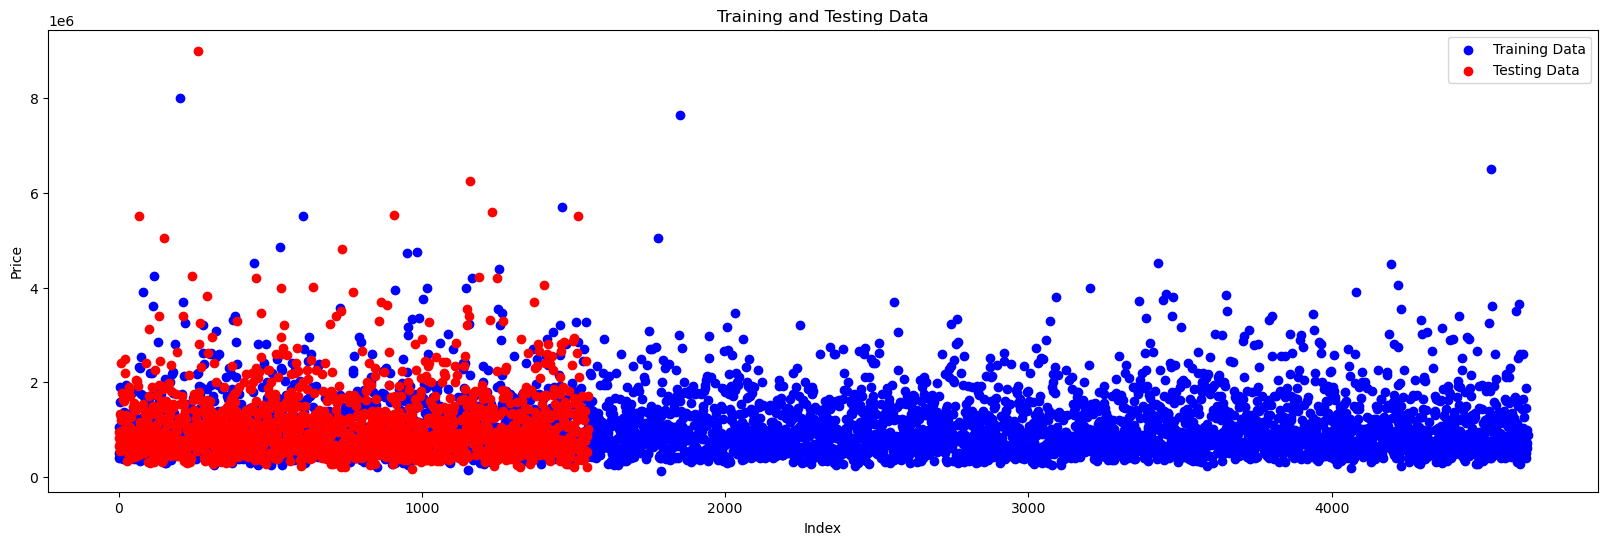


Training data percentage: 75.0
Testing data percentage: 25.0
Training data percentage: 80.0
Testing data percentage: 20.0


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of indices for both training and testing data
train_indices = np.arange(len(train_y))
val_indices = np.arange(len(val_y))

# Plot training data
plt.figure(figsize=(20, 6))
plt.scatter(train_indices, train_y, color='blue', label='Training Data')

# Plot testing data
plt.scatter(val_indices, val_y, color='red', label='Testing Data')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Training and Testing Data')
plt.legend()
plt.show()

## What percent of the data is used for training and what percent of the data is used for testing? ####
total_samples = len(X)        #Find the total number of samples in your dataset
train_samples = len(train_X)  #Find the total number of samples in your training data
test_samples = len(val_X)     #Find the total number of samples in your validation data

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100
print()
print("Training data percentage:", train_percentage)
print("Testing data percentage:", test_percentage)

################################################################################
#### TO DO: Q2.7 What percentage of your entries is used for training the model? What percentage of your entries is used for testing the model?
################################################################################

# Hypothetical sizes of training and testing datasets
total_samples = 1000  # Example total
train_samples = 800   # Example training data size (80% of total)
test_samples = 200    # Example testing data size (20% of total)

# Calculate percentages
train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

print("Training data percentage:", train_percentage)
print("Testing data percentage:", test_percentage)


In [82]:

################################################################################
############## Section 3: Adjusting your Machine Learning Model  ###############
################################################################################


#Let's experiment with alternative models and see which gives the best predictions. You can see in scikit-learn's documentation that the decision tree model has many options.
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# Recall that a tree's depth is a measure of how many splits it makes before coming to a prediction. In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf.
# As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses.
# Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210  groups of houses by the time we get to the 10th level. That's 1024 leaves.

# When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values,
# but they may make very unreliable predictions for new data (because each prediction is based on only a few houses). This is a phenomenon called overfitting,
# where a model matches the training data almost perfectly, but does poorly in validation and other new data.

# On the flip side, if we make our tree very shallow (eg. 2-4 splits), it doesn't divide up the houses into very distinct groups.
# In this situation, resulting predictions may be far off for most houses, even in the training data.
# When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

# There are a few ways to find the best tree depth, and many allow for some routes through the tree to have greater depth than other routes.
# But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting



################################################################################
#### TO DO: Q3.1 What does the max leaf nodes argument describe for a Decision Tree model?
################################################################################


# Let's define a function to help compare MAE scores from different values for max_leaf_nodes:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

# Initialize variables to store the minimum MAE and the corresponding value of max_leaf_nodes
min_mae = float('inf')
best_max_leaf_nodes = None

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

    # Update the minimum MAE and corresponding max_leaf_nodes if a new minimum is found
    if my_mae < min_mae:
        min_mae = my_mae
        best_max_leaf_nodes = max_leaf_nodes

# Output the max leaf nodes with the smallest mean absolute error
print("\nMax leaf nodes with the smallest mean absolute error:", best_max_leaf_nodes)


Max leaf nodes: 5  		 Mean Absolute Error:  355591
Max leaf nodes: 50  		 Mean Absolute Error:  307994
Max leaf nodes: 500  		 Mean Absolute Error:  336219
Max leaf nodes: 5000  		 Mean Absolute Error:  377515

Max leaf nodes with the smallest mean absolute error: 50


Q3.1 What does the max leaf nodes argument describe for a Decision Tree model?The max_leaf_nodes argument is a way to control the trade-off between overfitting and underfitting in a decision tree model, aiming to optimize the model's generalization ability to new, unseen data.

Decision Tree with one layer of depth (and two leaves)



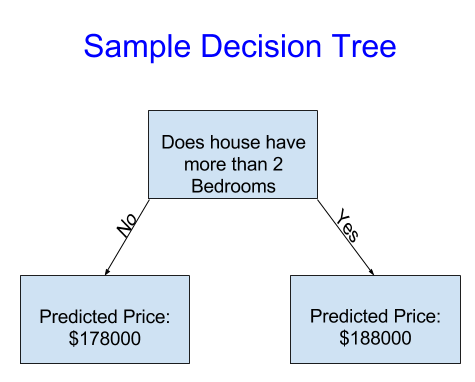

In [74]:
print("Decision Tree with one layer of depth (and two leaves)")
print()
Image("https://storage.googleapis.com/kaggle-media/learn/images/7tsb5b1.png")

In [83]:
# Q3.2 Write a script which finds the optimal number of max leaf nodes for your Decision Tree model. What is the optimal number of max leaf nodes?
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Function to get MAE from Decision Tree model given a number of max leaf nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Compare MAE with different values of max_leaf_nodes to find the optimal
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000]
# Dictionary to store the MAE for each value of max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Best size of max_leaf_nodes
best_tree_size = min(scores, key=scores.get)
best_tree_size, scores[best_tree_size]


(50, 307994.0802554117)

The optimal number of max leaf nodes for the Decision Tree model, based on minimizing the Mean Absolute Error (MAE), is 50. With this configuration, the MAE is approximately $307,994.08. This suggests that a Decision Tree model with 50 max leaf nodes provides the best balance between complexity and predictive accuracy for this particular dataset.

In [78]:
################################################################################
############## Section 4: Use Different Machine Learning Models  ###############
################################################################################


#### Random Forest Model ####

# The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree.
# It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.
# If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

################################################################################
#### TO DO: Q4.1 What is the MAE for your Random Forest model?
################################################################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming train_X, train_y, val_X, and val_y are already defined as part of your dataset split...

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, melb_preds)

print(mae)

#TO DO: Q4.2 What is the difference between Decision Tree and Random Forest models?
#Decision Tree is a simple, decision-making diagram. It splits a dataset based on different conditions and is very intuitive and easy to understand. However, it tends to overfit the training data, making it less effective for predictive analytics on unseen data.Random Forest is an ensemble method that creates a 'forest' of many decision trees, usually trained with the 'bagging' method. The basic idea is to combine the prediction of several decision trees to produce a more accurate and stable prediction. Unlike a single decision tree, Random Forest can handle overfitting better by averaging or 'voting' from the predictions of multiple trees.


# TO DO: Q4.3 Use the machine learning model XGBoost to train and test a new model. What is the MAE for your XGBoost model?
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
xgb_model = XGBRegressor(random_state=1)

# Fit the model
xgb_model.fit(train_X, train_y)

# Make predictions
xgb_preds = xgb_model.predict(val_X)

# Calculate MAE
xgb_mae = mean_absolute_error(val_y, xgb_preds)

print(xgb_mae)

from xgboost import XGBRegressor

287194.5265390969
287194.5265390969
288202.8806891543
